# <center>大模型 AI Agent 开发实战

## <center>Ch.15 MicroSoft AutoGen 开发框架基础入门

<div align=center><img src="https://muyu20241105.oss-cn-beijing.aliyuncs.com/images/202412261448743.png" width=100%></div>

# 1. AutoGen 框架介绍

&emsp;&emsp;`AutoGen` 是 `Microsoft` 在大模型技术领域推出的开创性 `AI Agent` 开发框架，也是目前最受欢迎的`AI Agent`开发工具之一。自 `2023` 年 `10` 月发布以来，`AutoGen` 凭借其前沿的技术迭代目前在 `GitHub` 上已累计获得超过 36.7k 次的星标，同时截至`2025年01月03日`，`AutoGen`开源的最新版本是`0.2.40`，期间已经迭代了`65`个小版本，具有非常广泛的用户关注度和社区活跃度。如下图所示：

<div align=center><img src="https://muyu20241105.oss-cn-beijing.aliyuncs.com/images/202501031004098.png" width=90%></div>

&emsp;&emsp;**`AutoGen` 框架的一大特色是支持创建对话式应用**。也就是说它构建多代理的方式是使多个智能体能够相互交流，从而促进不同智能体之间的合作以完成最终的任务。简单的理解就是这个框架可以让不同的`Agent`建立起通信的连接，然后**它提供给开发者的使用方式是，其一可以为每个`Agent`自定义大模型、角色、工具及行为，其二可以创建不同的对话模式，包括一问一答、联合聊天、分层聊天等等**，从而实现高度个性化的应用场景设计。如下图所示：

> MicroSoft AutoGen Docs：https://microsoft.github.io/autogen/0.2/docs/Getting-Started

<div align=center><img src="https://muyu20241105.oss-cn-beijing.aliyuncs.com/images/202412261742820.png" width=90%></div>

- **Agent Customization**

&emsp;&emsp;`AutoGen`支持开发者根据特定需求定制代理（Agent）。这种定制化**允许开发者定义代理的行为、响应方式和功能，使其适应不同的应用场景**。例如，我们可以创建自定义代理来执行特定的算术操作或其他任务。此外，**`AutoGen` 还允许集成自定义的大模型，进一步增强代理的能力**。

- **Multi-Agent Conversations**

&emsp;&emsp;`AutoGen` 支持多代理对话（Multi-Agent Conversations）。在 `AutoGen` 中，**多个代理（Agents）可以通过对话相互交流，协作完成复杂任务**。这些代理可以由大语言模型（LLMs）、人类输入或工具驱动，具备可定制和可对话的特性。

- **Flexible Conversation Patterns**

&emsp;&emsp;`AutoGen` 支持灵活的对话模式（Flexible Conversation Patterns），允许开发者根据应用需求设计多种代理交互方式。比如**联合聊天（Joint Chat）**，在这种模式下，多个代理共同参与同一个对话线程，所有代理共享相同的上下文。而**层次化聊天（Hierarchical Chat）** 这种模式涉及将一个工作流封装为单个代理，以便在更大的工作流中重复使用。除此以外，像最基本的对话形式（Two-Agent Chat）用来构建两个代理之间的交流，顺序对话（Sequential Chat）通过上下文传递将前一次对话的摘要带入下一次对话等等多样化的对话模式，能够覆盖绝大部分的应用需求。

&emsp;&emsp;基于上述提到的这些功能和模式，`AutoGen`的开源仓库中提供了非常多如`MathChat`、`文本分析`等应用模板，可以在我们的项目中自由修改和部署，这也是它非常受欢迎的一个主要原因。

&emsp;&emsp;**`AutoGen`框架的第二大优势，则是与其他`AI Agent`开发框架（如 `LangChain`、`LangGraph`）、`RAG` 以及函数调用等功能集成在一起**，所以我们可以非常方便的通过额外的知识源去增强基于大模型的代理能力，从而使基于`AutoGen`构建的智能体可以解决相对复杂的问题和更多元化的应用场景。

&emsp;&emsp;在基本了解了 `AutoGen` 框架的核心特点后，接下来我们就尝试在本地的 `Python` 环境中实践，利用该框架构建一个实际的 `AI Agent` 应用程序。在学习框架使用方法的同时，也能直观体验最终应用的效果。

# 2. 安装AutoGen开发环境 

&emsp;&emsp;如果使用 `Microsoft AutoGen` 进行`AI Agent`的开发，首先需要配置一个本地 `Python` 环境。`MicroSoft` 的官方要求是 `Python` 版本 >= 3.8并且< 3.13 ，我们建议建议 `Python` 版本 >= 3.10。为了方便管理项目依赖和隔离开发环境，我们这里使用 `Anaconda3` 作为环境管理工具。当然，大家也可以选择使用 `Pycharm` 或者 `Vscode` 工具。

- **Step 1. 安装Anaconda 3**

&emsp;&emsp;Anaconda3 官网：https://www.anaconda.com/ 

<div align=center><img src="https://muyu001.oss-cn-beijing.aliyuncs.com/img/image-20240113012053783.png" width=100%></div>

- **Step 2. 使用conda创建虚拟环境**

&emsp;&emsp;首先打开`Anaconda3`的`Anaconda Prompt`，位置如下：

<div align=center><img src="https://muyu20241105.oss-cn-beijing.aliyuncs.com/images/202412261830570.png" width=90%></div>

&emsp;&emsp;为`AutoGen`项目创建一个新的虚拟环境。使用`conda`安装项目依赖时，最好先创建一个虚拟环境，可以将项目的依赖与系统中的其他`Python`项目隔离开来。不同的`Python`项目可能需要同一库的不同版本。在虚拟环境中工作可以防止版本冲突。在 `Conda` 中创建虚拟环境的步骤相对简单。以下是创建虚拟环境的基本步骤：

&emsp;&emsp;首先，使用以下命令创建一个新的虚拟环境，其中 `myenv` 是给环境起的名字，`python=3.11` 指定该虚拟环境下使用的`Python`的版本，如果不指定`Python`版本，`Conda`将使用默认的`Python`版本创建环境。

```bash

# 建议 选择 python 3.10 ~ 3.11 版本
conda create --name autogen python=3.11 -y
```

<div align=center><img src="https://muyu20241105.oss-cn-beijing.aliyuncs.com/images/202412261855455.png" width=90%></div>

&emsp;&emsp;创建环境后，需要激活它才能开始使用。在 `Windows` 上，使用：
```bash
conda activate autogen
```

<div align=center><img src="https://muyu20241105.oss-cn-beijing.aliyuncs.com/images/202412261855456.png" width=90%></div>

&emsp;&emsp;然后在激活的环境中，运行以下命令安装 `Jupyter` 和 `ipykernel`，命令如下：
```bash
conda install jupyter ipykernel -y
```

<div align=center><img src="https://muyu20241105.oss-cn-beijing.aliyuncs.com/images/202412261855457.png" width=90%></div>

&emsp;&emsp;接下来将当前环境注册为 `Jupyter` 的内核，执行如下命令：
```bash
python -m ipykernel install --user --name=autogen --display-name "Python 3.11 (autogen)"
```

<div align=center><img src="https://muyu20241105.oss-cn-beijing.aliyuncs.com/images/202412261855458.png" width=90%></div>

&emsp;&emsp;最后，启动 `Jupyter Notebook` 或 `Lab`， 在 `命令提示符（CMD）`中输入如下命令：

```bash
jupyter lab
```

<div align=center><img src="https://muyu20241105.oss-cn-beijing.aliyuncs.com/images/202412261855459.png" width=90%></div>

&emsp;&emsp;在 `Jupyter Lab` 前端中，创建一个新 `Notebook`，在右上角选择内核，确保显示 "Python 3.11 (autogen)"。

<div align=center><img src="https://muyu20241105.oss-cn-beijing.aliyuncs.com/images/202412261855460.png" width=90%></div>

# 3. 安装AutoGen依赖

&emsp;&emsp;在准备好本地的`Python`运行环境后，使用 `AutoGen` 需要安装其相关的依赖包，其中包括 `autogen-agentchat`。这是 `AutoGen` 的核心组件之一，用于实现多代理协作和对话功能。根据 `AutoGen` 的当前版本信息，推荐安装的版本范围是 `autogen-agentchat~=0.2`。我们可以在当前的环境下执行如下命令：

In [2]:
# ! pip install autogen-agentchat~=0.2

# 4. ConversableAgent源码解析

&emsp;&emsp;在 `AutoGen` 框架中，代理（Agent）可以由多种组件驱动，主要包括：

- **大语言模型（LLMs）**：例如 `GPT-4` 、`GLM 4`等，用于自然语言处理和生成。
- **人类输入**：代理可以接受人类的直接输入，进行交互或获取指令。
- **代码执行器**：如 IPython 内核，允许代理执行代码，实现动态计算和任务处理。
- **其他可插拔和可定制的组件**：根据具体需求，代理可以集成其他工具或功能模块，以扩展其能力。

&emsp;&emsp;这四种不同类型的代理之间能够进行对话交互，而 `AutoGen`做的事情就是提供多种不同的实现方法来支持这些交互。其中，我们**需要优先学习和掌握的，是`AutoGen`框架内置的 `ConversableAgent`。该类作为一个基础的代理类，提供了非常灵活的接口，允许我们根据具体需求启用或禁用特定功能，并进行相应的配置**。除此以外，`AssistantAgent` 和 `UserProxyAgent` 都是 `ConversableAgent` 的子类，分别用于执行任务处理、调用 `API` 和逻辑推理，以及模拟用户输入和执行代码等，我们将在后续的课程中再逐步的展开介绍。

> AutoGen ConversableAgent：https://microsoft.github.io/autogen/0.2/docs/tutorial/introduction

<div align=center><img src="https://muyu20241105.oss-cn-beijing.aliyuncs.com/images/202412271046637.png" width=90%></div>

&emsp;&emsp;`ConversableAgent`类的源码定义位置如下：

<div align=center><img src="https://muyu20241105.oss-cn-beijing.aliyuncs.com/images/202412311659650.png" width=90%></div>

&emsp;&emsp;这里我们先关注 `ConversableAgent` 类的 `__init__` 方法，其定义如下：

```python
    def __init__(
        self,
        name: str,
        system_message: Optional[Union[str, List]] = "You are a helpful AI Assistant.",
        is_termination_msg: Optional[Callable[[Dict], bool]] = None,
        max_consecutive_auto_reply: Optional[int] = None,
        human_input_mode: Literal["ALWAYS", "NEVER", "TERMINATE"] = "TERMINATE",
        function_map: Optional[Dict[str, Callable]] = None,
        code_execution_config: Union[Dict, Literal[False]] = False,
        llm_config: Optional[Union[Dict, Literal[False]]] = None,
        default_auto_reply: Union[str, Dict] = "",
        description: Optional[str] = None,
        chat_messages: Optional[Dict[Agent, List[Dict]]] = None,
    ):
```

&emsp;&emsp;在 `ConversableAgent` 类的 `__init__` 方法中，参数分为必填和选填两类。必填参数在实例化时必须提供，而选填参数有默认值，可根据需要进行配置。以下是这些参数的详细说明：

| 参数名 | 类型 | 默认值 | 必填/选填 | 说明 |
| --- | --- | --- | --- | --- |
| `name` | `str` | 无 | 必填 | 代理的名称。 |
| `system_message` | `Optional[Union[str, List]]` | `"You are a helpful AI Assistant."` | 选填 | 用于 ChatCompletion 推理的系统消息。 |
| `is_termination_msg` | `Optional[Callable[[Dict], bool]]` | `None` | 选填 | 判断接收到的消息是否为终止消息的函数。该函数接受一个字典形式的消息，返回布尔值。字典可能包含以下键："content"、"role"、"name"、"function_call"。 |
| `max_consecutive_auto_reply` | `Optional[int]` | `None` | 选填 | 连续自动回复的最大次数。默认为 `None`（无特定限制，此时将使用类属性 `MAX_CONSECUTIVE_AUTO_REPLY` 作为限制）。设置为 `0` 时，不会生成自动回复。 |
| `human_input_mode` | `Literal["ALWAYS", "NEVER", "TERMINATE"]` | `"TERMINATE"` | 选填 | 指定在每次收到消息时是否请求人类输入。可能的取值包括：<br> - `"ALWAYS"`：每次收到消息时都请求人类输入。在此模式下，当人类输入为 `"exit"`，或 `is_termination_msg` 返回 `True` 且没有人类输入时，对话停止。<br> - `"TERMINATE"`：仅在收到终止消息或自动回复次数达到 `max_consecutive_auto_reply` 时请求人类输入。<br> - `"NEVER"`：从不请求人类输入。在此模式下，当自动回复次数达到 `max_consecutive_auto_reply` 或 `is_termination_msg` 返回 `True` 时，对话停止。 |
| `function_map` | `Optional[Dict[str, Callable]]` | `None` | 选填 | 将函数名称映射到可调用函数的字典，用于工具调用。 |
| `code_execution_config` | `Union[Dict, Literal[False]]` | `False` | 选填 | 代码执行的配置。若设置为 `False`，则禁用代码执行。否则，应设置为包含以下键的字典：<br> - `work_dir`（可选，`str`）：代码执行的工作目录。若为 `None`，将使用默认工作目录，通常为 `autogen` 路径下的 "extensions" 目录。<br> - `use_docker`（可选，`list`、`str` 或 `bool`）：用于代码执行的 Docker 镜像。默认为 `True`，表示将在 Docker 容器中执行代码，并使用默认的镜像列表。若提供了镜像名称的列表或字符串，将在成功拉取的第一个镜像中执行代码。若为 `False`，将在当前环境中执行代码。强烈建议使用 Docker 进行代码执行。<br> - `timeout`（可选，`int`）：代码执行的最大时间（秒）。<br> - `last_n_messages`（实验性，`int` 或 `str`）：用于代码执行的消息回溯数量。若设置为 `'auto'`，将向后扫描自代理上次发言以来的所有消息，通常是上次尝试执行代码以来的消息。 |
| `llm_config` | `Optional[Union[Dict, Literal[False]]]` | `None` | 选填 | LLM 推理配置。请参考 [OpenAIWrapper.create](https://microsoft.github.io/autogen/0.2/docs/reference/oai/client#create) 获取可用选项。使用 OpenAI 或 Azure OpenAI 时，请在 `llm_config` 或 `llm_config` 中的 `config_list` 的每个配置中指定非空的 `'model'`。若设置为 `False`，则禁用基于 LLM 的自动回复。若为 `None`，将使用 `self.DEFAULT_CONFIG`，默认为 `False`。 |
| `default_auto_reply` | `Union[str, Dict]` | `""` | 选填 | 当未生成代码执行或基于 LLM 的回复时的默认自动回复。 |
| `description` | `Optional[str]` | `None` | 选填 | 代理的简短描述。其他代理（如 `GroupChatManager`）可根据此描述决定何时调用该代理。默认为 `system_message`。 |
| `chat_messages` | `Optional[Dict[Agent, List[Dict]]]` | `None` | 选填 | 代理与其他代理之间的先前聊天消息记录。可用于提供聊天历史，从而使代理具备记忆功能，能够恢复之前的对话。默认为空的聊天历史。 |

&emsp;&emsp;这些参数允许在实例化 `ConversableAgent` 时进行灵活配置，以满足不同的对话需求。而仔细查看`ConversableAgent(LLMAgent)`中定义的子方法后，能够明确其核心在于：**它用于处理消息的接收与发送、管理对话记录、执行代码与工具调用，并支持与大模型（LLM）的集成。它具备灵活的自动回复配置能力，通过注册自定义触发条件和回复函数来实现高度定制化的交互。除此之外，类还提供异步与嵌套对话支持，确保复杂对话场景的高效处理。这些特性使 ConversableAgent 成为开发多功能对话系统的基础工具。** 因代码涉及量非常大，所以感兴趣的小伙伴可以自行查看其具体的内部实现逻辑，这里我们直接进行接口参数的实践讲解。

&emsp;&emsp;我们首先来进行实践：**在大模型驱动下的`ConversableAgent`应该如何进行自然语言对话。**

## 4.1 构建大模型驱动的代理

&emsp;&emsp;`AutoGen` 框架支持以下三种类型的大模型接入，分别是：
- **OpenAI 模型**：如 `gpt-3.5-turbo`、`gpt-4` 等。
- **Azure OpenAI 模型**：通过 `Azure` 平台提供的 `OpenAI` 服务。
- **其他兼容 OpenAI API 的模型**：如 `Anthropic` 的 `Claude` 系列模型，`Ollama`、`Vllm`接入的本地开源大模型。

> AutoGen LLM Configuration：https://microsoft.github.io/autogen/0.2/docs/topics/llm_configuration/

<div align=center><img src="https://muyu20241105.oss-cn-beijing.aliyuncs.com/images/202412271108968.png" width=90%></div>

&emsp;&emsp;`OpenAI` 大家都非常熟悉了，其公司的`GPT`系列模型一直都是我们课程中使用、且重点介绍的。`Azure OpenAI`服务是微软与 `OpenAI` 合作推出的云服务，通过将 `OpenAI` 的模型与微软 `Azure` 的企业级安全性和基础设施相结合，用户可以在 `Azure` 平台上访问和使用 `OpenAI` 的模型，直接的好处是在国内网络`Azure OpenAI` 服务，而无需使用翻墙工具。使用国内的信用卡、手机号和 IP 地址即可在 `Azure` 上注册账户并申请 `OpenAI` 服务。 但目前好像已暂停中国个人用户的 `OpenAI` 服务，如果有此类需求的小伙伴可以查看官网确定最新的政策。链接：https://azure.microsoft.com/en-us/products/ai-services/openai-service

&emsp;&emsp;除此以外，对于非`OpenAI`的`GPT`系列模型，`AutoGen`框架还支持接入任意符合`OpenAI` 兼容 `API` 的代理服务器，比如我们课程中在《在线大模型调用》模块讲解的`Anthropic Claude`、`Gemini`, `GLM`等，《开源大模型部署与调用模块》讲解的`Ollama`、`vllm`等都可以无缝接入到`AutoGen`中构建大模型驱动的代理。

> AutoGen Non-OpenAI Models：https://microsoft.github.io/autogen/0.2/docs/topics/non-openai-models/about-using-nonopenai-models

<center><img src="https://muyu20241105.oss-cn-beijing.aliyuncs.com/images/202412311647693.png" alt="1728478294264" style="zoom:80%;" />

&emsp;&emsp;接下来，我们就针对不同形式的模型来详细的介绍其接入`ConversableAgent`代理的方式。首先，还是以`OpenAI`的`GPT`模型进行实践。

### 4.1.1 使用在线大模型

&emsp;&emsp;我们先通过`OpenAI`的`GPT`模型测试接入`AutoGen`的流程，首先，确保在本地的`Python`环境中可以正常访问到`GPT`模型。**注意：在本地`Python`环境调用需要具备两个条件：1.一个有效的OpenAI API_Key。2. 魔法上网环境。** 在当前环境下先测试能否顺利调用`OpenAI GPT`大模型，测试代码如下：

In [1]:
# ! pip install openai

&emsp;&emsp;接下来需要通过如下命令将`OpenAI API_Keys`设置在`Windows`系统的环境变量中。 

In [10]:
# ! setx OPENAI_API_KEY "your_api_key_here"   # 这里替换成自己实际使用的 OpenAI API Keys

&emsp;&emsp;设置此环境变量的目的是为了在使用 `OpenAI` 的 `API` 时，程序能够自动读取该密钥进行身份验证。通过将 API 密钥存储在环境变量中，可以避免在代码中直接硬编码密钥，从而提高安全性和灵活性。**注意：配置完成后，需要重启电脑，方可使环境变量生效。**

In [1]:
from openai import OpenAI
client = OpenAI()  # 这是不使用国内中转代理的实例化方法
# client = OpenAI(base_url='https://ai.devtool.tech/proxy/v1')   # 这是使用国内中转代理的实例化方法

&emsp;&emsp;通过调用`models.list()`方法，可以查看到当前的API_key都可以调用哪些`GPT`模型。

In [2]:
print(client.models.list())

SyncPage[Model](data=[Model(id='gpt-4o-audio-preview-2024-10-01', created=1727389042, object='model', owned_by='system'), Model(id='gpt-4o-realtime-preview', created=1727659998, object='model', owned_by='system'), Model(id='gpt-4o-realtime-preview-2024-10-01', created=1727131766, object='model', owned_by='system'), Model(id='dall-e-2', created=1698798177, object='model', owned_by='system'), Model(id='gpt-4-turbo', created=1712361441, object='model', owned_by='system'), Model(id='gpt-4-1106-preview', created=1698957206, object='model', owned_by='system'), Model(id='gpt-3.5-turbo', created=1677610602, object='model', owned_by='openai'), Model(id='gpt-3.5-turbo-0125', created=1706048358, object='model', owned_by='system'), Model(id='gpt-3.5-turbo-instruct', created=1692901427, object='model', owned_by='system'), Model(id='babbage-002', created=1692634615, object='model', owned_by='system'), Model(id='whisper-1', created=1677532384, object='model', owned_by='openai-internal'), Model(id='da

In [3]:
model = client.models.list()

for model in model.data:
    print(model.id)

gpt-4o-audio-preview-2024-10-01
gpt-4o-realtime-preview
gpt-4o-realtime-preview-2024-10-01
dall-e-2
gpt-4-turbo
gpt-4-1106-preview
gpt-3.5-turbo
gpt-3.5-turbo-0125
gpt-3.5-turbo-instruct
babbage-002
whisper-1
dall-e-3
o1-preview-2024-09-12
text-embedding-3-small
gpt-3.5-turbo-16k-0613
o1-preview
gpt-3.5-turbo-16k
gpt-4-0125-preview
gpt-4o-mini-2024-07-18
gpt-4-turbo-preview
gpt-4o-mini
omni-moderation-latest
gpt-4o-2024-05-13
omni-moderation-2024-09-26
tts-1-hd-1106
gpt-4
gpt-4-0613
chatgpt-4o-latest
tts-1-hd
text-embedding-ada-002
gpt-3.5-turbo-1106
gpt-4o-audio-preview
tts-1
tts-1-1106
gpt-3.5-turbo-instruct-0914
davinci-002
gpt-4o-2024-08-06
text-embedding-3-large
gpt-4o
gpt-4o-realtime-preview-2024-12-17
gpt-4o-mini-realtime-preview
gpt-4o-mini-realtime-preview-2024-12-17
o1-mini
gpt-4o-2024-11-20
o1-mini-2024-09-12
gpt-4o-audio-preview-2024-12-17
gpt-4o-mini-audio-preview
gpt-4o-mini-audio-preview-2024-12-17
gpt-4-turbo-2024-04-09
ft:gpt-3.5-turbo-0613:acmr:recipe-ner:7rOJnQow
ft:

&emsp;&emsp;如果能正常返回结果，则说明当前的网络环境是正常的。接下来我们看一下如何在`ConversableAgent`中接入`OpenAI`的`GPT`模型进行交互。

&emsp;&emsp;`class ConversableAgent(LLMAgent)` 是通用可对话代理的类，因此**它的核心功能是可以直接针对用户输入的问题生成大模型的响应，并且返回到用户端。 另外，因为需要接入大模型去驱动代理，所以这里需要使用 `ConversableAgent` 类中的`llm_config`参数来指定大模型实例。** 而关于如何使用，我们需要关注一下`class ConversableAgent(LLMAgent)`源码中的定义逻辑，主要有以下两个关注点：

&emsp;&emsp;首先，根据`class ConversableAgent(LLMAgent)`类的定义，`llm_config`需要接收的是一个字典：
```python
llm_config: Optional[Union[Dict, Literal[False]]] = None,
```

&emsp;&emsp;其次，在`_validate_llm_config`方法中，其校验的逻辑如下：
```python
    def _validate_llm_config(self, llm_config):
        assert llm_config in (None, False) or isinstance(
            llm_config, dict
        ), "llm_config must be a dict or False or None."
        if llm_config is None:
            llm_config = self.DEFAULT_CONFIG
        self.llm_config = self.DEFAULT_CONFIG if llm_config is None else llm_config
        # TODO: more complete validity check
        if self.llm_config in [{}, {"config_list": []}, {"config_list": [{"model": ""}]}]:
            raise ValueError(
                "When using OpenAI or Azure OpenAI endpoints, specify a non-empty 'model' either in 'llm_config' or in each config of 'config_list'."
            )
        self.client = None if self.llm_config is False else OpenAIWrapper(**self.llm_config)
```

&emsp;&emsp;这里会验证 `llm_config` 必须是 `None`、`False` 或字典。如果 `llm_config` 包含键 `config_list`，则该键值必须是一个列表，其中每个字典对象需要包含一个有效的 'model'。如果没有提供 config_list 或其中的 model 为空，则会抛出错误。因此，如果我们这里想接入一个`OpenAI`的`GPT`模型，接入规范就如下所示：

In [7]:
# ! pip install flaml[automl]  # 不安装这个包会产生警告信息

- **name 与 llm_config 参数解析**

In [4]:
import os

from autogen import ConversableAgent

agent = ConversableAgent(
    name="chatbot",
    llm_config={"config_list": 
                [{"model": "gpt-4o-mini", 
                  "api_key": os.environ.get("OPENAI_API_KEY")}]},
)

&emsp;&emsp;`config_list` 允许指定不同的端点和配置 被使用。在此方法中，`config_list` 中的每个字典必须包含**至少一个 `model` 和 `api_key` 的组合**。如果缺少 `model` 或 `api_key`，会触发 ValueError。其可以使用的参数如下：

| 参数名称       | 类型        | 必需性    | 描述                                                                 |
| -------------- | ----------- | --------- | -------------------------------------------------------------------- |
| `model`        | `str`       | 必需      | 要使用的模型的标识符，例如 `'gpt-4'`，`'gpt-3.5-turbo'`。            |
| `api_key`      | `str`       | 可选      | 验证模型 API 端点请求所需的 API 密钥。                               |
| `api_rate_limit` | `float`   | 可选      | 指定每秒允许的最大 API 请求数。                                      |
| `base_url`     | `str`       | 可选      | API 端点的基本 URL，这是 API 调用所定向的根地址。                   |
| `tags`         | `List[str]` | 可选      | 可用于过滤的标签。                                                  |

&emsp;&emsp;最后，如果想要触发大模型调用并且得到最终的响应，则需要在定义的`agent`实例中（即`ConversableAgent`）调用`generate_reply`方法。`generate_reply` 是 `ConversableAgent` 的核心功能之一，此函数会根据接收到的消息和配置，通过一系列注册的处理函数和回复生成函数，来产生一个回复。

```python
    async def a_generate_reply(
        self,
        messages: Optional[List[Dict[str, Any]]] = None,
        sender: Optional["Agent"] = None,
        **kwargs: Any,
    ) -> Union[str, Dict[str, Any], None]:
        if all((messages is None, sender is None)):
            error_msg = f"Either {messages=} or {sender=} must be provided."
            logger.error(error_msg)
            raise AssertionError(error_msg)

        if messages is None:
            messages = self._oai_messages[sender]

        messages = self.process_all_messages_before_reply(messages)

        messages = self.process_last_received_message(messages)

        for reply_func_tuple in self._reply_func_list:
            reply_func = reply_func_tuple["reply_func"]
            if "exclude" in kwargs and reply_func in kwargs["exclude"]:
                continue

            if self._match_trigger(reply_func_tuple["trigger"], sender):
                if inspect.iscoroutinefunction(reply_func):
                    final, reply = await reply_func(
                        self, messages=messages, sender=sender, config=reply_func_tuple["config"]
                    )
                else:
                    final, reply = reply_func(self, messages=messages, sender=sender, config=reply_func_tuple["config"])
                if final:
                    return reply
        return self._default_auto_reply
```

&emsp;&emsp;源码 `generate_reply` 的逻辑主要围绕以下两点：`

- **第一步：根据消息内容和发送方，决定是否执行普通问答逻辑或触发与其他 Agent 的交互**。
  - 普通问答: 如果当前的 `messages` 表示普通对话内容，那么直接按消息上下文调用适当的回复逻辑（如调用 LLM 或简单地使用默认回复）。
  - 如果有一个明确的 `sender`，则消息会被理解为来自某个特定 `Agent` 的请求。
<br>
<br> 
- **第二步：在会话过程中，检查是否需要调用不同类型的回复函数，并按优先级顺序依次尝试生成响应**。回复函数的类型与优先级为：
  - check_termination_and_human_reply：检查是否需要终止会话或请求人类输入。
  - generate_function_call_reply：处理函数调用（已废弃，建议使用 tool_calls）。
  - generate_tool_calls_reply：生成工具调用相关的回复。
  - generate_code_execution_reply：根据消息中的代码块执行代码并返回结果。
  - generate_oai_reply：通过 LLM 模型生成对话回复。

&emsp;&emsp;`ConversableAgent`类中`generate_reply`方法定义过程其实是比较复杂的，但使用非常简单。对于普通的大模型对话交互过程，我们只需要传入`messages`字段，`generate_reply` 就会自动处理所有的内部逻辑，因此调用代码如下：

In [7]:
# 调用代理生成回复
reply = agent.generate_reply(
    messages=[
        {
            "role": "user",
            "content": "你好，请你非常详细的介绍一下你自己"
        }
    ]
)

# 打印生成的回复
print(reply)


>>>>>>>> USING AUTO REPLY...
你好！我是一个人工智能助手，旨在提供信息和建议以帮助解答问题。我是基于大量数据和语言模型训练而成的，能够理解和产生自然语言文本。以下是一些关于我的详细介绍：

1. **功能**：我可以进行多种任务，包括回答问题、提供建议、撰写文章、翻译文本、生成创意内容等。我的目标是帮助用户获得所需的信息并解决问题。

2. **知识范围**：我的知识涵盖许多领域，包括科学、历史、技术、文化、语言学习、心理学以及日常生活等。我会尽量提供准确的信息，但请注意，我的知识截至到2023年10月，因此对之后发生的事件可能不了解。

3. **沟通方式**：我可以以自然语言进行交流，用户可以用普通话、英语等多种语言与我对话。我会理解上下文，尽量提供清晰和相关的回答。

4. **学习能力**：虽然我不能主动学习或记住用户的个人信息，但我的设计使我能够逐步改进与用户的互动。根据用户的反馈和指令，我可以适应并提高我的回答质量。

5. **局限性**：我虽然知识面广泛，但在某些领域仍可能存在错误或不足。此外，我的回答不是专业意见，因此在重要决策时，最好还是咨询专业人士。

6. **隐私与安全**：我不会存储个人数据，所有的对话都是瞬时的，确保用户的隐私安全。

如果你有任何问题或需要进一步的信息，随时可以问我！


In [8]:
# 调用代理生成回复
reply = agent.generate_reply(
    messages=[
        {
            "role": "user",
            "content": "请你介绍一下什么是大模型。"
        }
    ]
)

# 打印生成的回复
print(reply)


>>>>>>>> USING AUTO REPLY...
“大模型”通常是指在人工智能和机器学习领域中，特别是深度学习领域中，训练的参数量非常庞大的模型。这些模型通常具备以下几个显著的特征：

1. **大规模参数**：大模型的参数数量通常可以达到亿级甚至千亿级以上，这使得它们能够学习到更加复杂和细腻的数据特征。

2. **多层结构**：大模型通常采用深层神经网络架构，即包含许多隐藏层，使其能够提取高层次的抽象特征。

3. **预训练和微调**：很多大模型会先在大规模的通用数据集上进行预训练，以获取基本的语言、视觉或其他特征，然后再在特定任务上进行微调，从而达到更好的表现。

4. **适用性广泛**：大模型可以用于多种任务，如自然语言处理（NLP）、计算机视觉、语音识别等，具备良好的迁移学习能力。

5. **计算资源需求高**：由于模型庞大，训练和推理过程中通常需要大量的计算资源，包括高性能的GPU或TPU集群。

6. **开创性应用**：大模型在很多领域引领了新的研究方向和应用场景，如OpenAI的GPT系列、Google的BERT、DALL-E等，都展现了大模型在生成和理解内容方面的强大能力。

总之，大模型推动了人工智能技术的进步，使得机器在理解和生成自然语言、处理图像、声音等方面达到了新的高度。然而，它们的训练和应用也面临着伦理、环境和资源等方面的挑战。


### 4.1.2 LLM Caching（缓存）

&emsp;&emsp;在成功使用`ConversableAgent`接入在线大模型生成问答的回复，这里有一点需要格外注意：**当我们使用相同的大模型并提出相同的问题时，会发现其回复速度非常快，且内容与之前一致**。比如：

In [9]:
# 调用代理生成回复
reply = agent.generate_reply(
    messages=[
        {
            "role": "user",
            "content": "请你介绍一下什么是大模型。"
        }
    ]
)

# 打印生成的回复
print(reply)


>>>>>>>> USING AUTO REPLY...
“大模型”通常是指在人工智能和机器学习领域中，特别是深度学习领域中，训练的参数量非常庞大的模型。这些模型通常具备以下几个显著的特征：

1. **大规模参数**：大模型的参数数量通常可以达到亿级甚至千亿级以上，这使得它们能够学习到更加复杂和细腻的数据特征。

2. **多层结构**：大模型通常采用深层神经网络架构，即包含许多隐藏层，使其能够提取高层次的抽象特征。

3. **预训练和微调**：很多大模型会先在大规模的通用数据集上进行预训练，以获取基本的语言、视觉或其他特征，然后再在特定任务上进行微调，从而达到更好的表现。

4. **适用性广泛**：大模型可以用于多种任务，如自然语言处理（NLP）、计算机视觉、语音识别等，具备良好的迁移学习能力。

5. **计算资源需求高**：由于模型庞大，训练和推理过程中通常需要大量的计算资源，包括高性能的GPU或TPU集群。

6. **开创性应用**：大模型在很多领域引领了新的研究方向和应用场景，如OpenAI的GPT系列、Google的BERT、DALL-E等，都展现了大模型在生成和理解内容方面的强大能力。

总之，大模型推动了人工智能技术的进步，使得机器在理解和生成自然语言、处理图像、声音等方面达到了新的高度。然而，它们的训练和应用也面临着伦理、环境和资源等方面的挑战。


In [10]:
# 调用代理生成回复
reply = agent.generate_reply(
    messages=[
        {
            "role": "user",
            "content": "请你介绍一下什么是大模型。"
        }
    ]
)

# 打印生成的回复
print(reply)


>>>>>>>> USING AUTO REPLY...
“大模型”通常是指在人工智能和机器学习领域中，特别是深度学习领域中，训练的参数量非常庞大的模型。这些模型通常具备以下几个显著的特征：

1. **大规模参数**：大模型的参数数量通常可以达到亿级甚至千亿级以上，这使得它们能够学习到更加复杂和细腻的数据特征。

2. **多层结构**：大模型通常采用深层神经网络架构，即包含许多隐藏层，使其能够提取高层次的抽象特征。

3. **预训练和微调**：很多大模型会先在大规模的通用数据集上进行预训练，以获取基本的语言、视觉或其他特征，然后再在特定任务上进行微调，从而达到更好的表现。

4. **适用性广泛**：大模型可以用于多种任务，如自然语言处理（NLP）、计算机视觉、语音识别等，具备良好的迁移学习能力。

5. **计算资源需求高**：由于模型庞大，训练和推理过程中通常需要大量的计算资源，包括高性能的GPU或TPU集群。

6. **开创性应用**：大模型在很多领域引领了新的研究方向和应用场景，如OpenAI的GPT系列、Google的BERT、DALL-E等，都展现了大模型在生成和理解内容方面的强大能力。

总之，大模型推动了人工智能技术的进步，使得机器在理解和生成自然语言、处理图像、声音等方面达到了新的高度。然而，它们的训练和应用也面临着伦理、环境和资源等方面的挑战。


- **cache_seed 参数解析**

&emsp;&emsp;这是因为 `AutoGen` 框架的设计采用了缓存机制。该对话过程支持对 `API` 请求进行缓存，以便在发出相同请求时可以重复使用之前的响应结果。这种机制在重复或持续的实验中非常有用，有助于提高结果的可重复性并节省成本。**从版本 `0.2.8` 开始，`AutoGen` 提供了一个可配置的上下文管理器，允许我们轻松配置 `LLM` 缓存，支持多种缓存类型，如磁盘缓存（DiskCache）、Redis 缓存（RedisCache）或 Azure Cosmos DB 缓存。**

&emsp;&emsp;其配置的方法在 `llm_config` 参数中，默认会开启缓存机制并存储在磁盘的上下文管理器中。如果想在调用`generate_reply`方法时禁用缓存，可以通过在代理的 `llm_config` 中设置 `cache_seed` 参数为 `None` 来实现。代码如下：

In [11]:
import os

from autogen import ConversableAgent

agent = ConversableAgent(
    name="chatbot",
    llm_config={
        "cache_seed": None,  # 禁用缓存
        "config_list": 
                [{"model": "gpt-4o-mini", 
                  "api_key": os.environ.get("OPENAI_API_KEY")}]},
)

In [12]:
# 调用代理生成回复
reply = agent.generate_reply(
    messages=[
        {
            "role": "user",
            "content": "请你介绍一下什么是大模型？"
        }
    ]
)

# 打印生成的回复
print(reply)


>>>>>>>> USING AUTO REPLY...
大模型（Large Model）通常指的是具有大量参数和复杂结构的机器学习模型，尤其是在深度学习领域。这些模型通过处理海量数据进行训练，以捕捉复杂的模式和特征。以下是大模型的一些关键特点：

1. **规模庞大**：大模型通常包含数亿到数万亿个参数。这样的规模使得模型能够学习并表示复杂的数据分布。

2. **计算资源需求高**：训练大模型需要消耗大量的计算资源，包括高性能的GPU或TPU集群。这使得训练过程通常需要较长的时间和较高的成本。

3. **数据依赖性强**：大模型需要大量的标注数据来进行有效训练，通常需要数十万到数亿个样本。

4. **应用范围广泛**：大模型在自然语言处理（如GPT、BERT）、计算机视觉（如Vision Transformers）、语音识别等领域表现出色。

5. **迁移学习能力**：大模型可以通过迁移学习的方式应用于不同的任务。预训练的大模型可以在特定任务上进行微调，从而快速适应新任务。

6. **开放性和可扩展性**：许多大模型是开源的，研究人员和开发者可以在这些基础上进行修改和扩展，推动相关领域的发展。

总的来说，大模型是现代人工智能技术的一项重要进展，能够处理复杂的任务并提供高水平的性能，但同时也面临着训练成本、能耗和可解释性等挑战。


In [13]:
# 调用代理生成回复
reply = agent.generate_reply(
    messages=[
        {
            "role": "user",
            "content": "请你介绍一下什么是大模型？"
        }
    ]
)

# 打印生成的回复
print(reply)


>>>>>>>> USING AUTO REPLY...
大模型（Large Model）通常是指在机器学习和深度学习领域中，具有大量参数和复杂结构的模型。这些模型通常用于处理大规模的数据集，并且在理解和生成文本、图像、音频等多种类型的数据方面表现出色。以下是大模型的一些关键特征和应用：

### 特征：

1. **参数量大**：大模型的参数通常是数亿到数千亿不等，这使得模型能够捕捉到更多的特征和细微的模式。

2. **预训练与微调**：大多数大模型首先在大规模的数据集上进行预训练，然后通过微调（fine-tuning）调整到特定任务上。这种方法能够利用预训练中学到的知识，提高在特定任务上的表现。

3. **深层网络结构**：大模型通常采用深层神经网络架构，例如 Transformer、BERT、GPT 等，能够处理复杂的模式和依赖关系。

4. **计算需求高**：训练和推理大模型需要大量的计算资源，通常需要使用高性能的GPU或TPU集群。

### 应用：

1. **自然语言处理（NLP）**：大模型在文本生成、机器翻译、情感分析、问答系统等任务中取得了显著进展。例如，GPT-3就是一个广泛应用于文本生成的知名大模型。

2. **计算机视觉**：在图像分类、物体检测和图像生成等任务中，大模型（如 Vision Transformer）也表现出了强大的能力。

3. **多模态学习**：大模型还可以融合不同类型的数据处理，能够同时理解文本和图像，实现多模态任务，如图像描述生成等。

4. **科学研究和医疗**：大模型在药物发现、基因组分析等医学领域也开始发挥作用，通过从大量数据中发现潜在的模式。

### 总结：

大模型在人工智能领域中扮演着越来越重要的角色，推动了各类应用的进步。然而，也面临着高计算成本、能耗和数据隐私等挑战。随着技术的进步，期望未来的研究可以解决这些问题，使得大模型的应用更为广泛和高效。


&emsp;&emsp;此时能够发现在上述代码中，通过在 `llm_config` 中设置 `"cache_seed": None`后可以禁用缓存功能。因此每次调用 `generate_reply` 时，都会直接向模型发送请求，而不会使用之前的缓存结果，从而每次都能得到不同的结果。

&emsp;&emsp;除此以外，还可以改变`cache_seed`参数以获得不同的大模型输出，同时仍然使用缓存。比如：

In [16]:
import os

from autogen import ConversableAgent

agent = ConversableAgent(
    name="chatbot",
    llm_config={
        "cache_seed": 24,  # 设置随机数种子
        "config_list": 
                [{"model": "gpt-4o-mini", 
                  "api_key": os.environ.get("OPENAI_API_KEY")}]},
)

# 调用代理生成回复
reply = agent.generate_reply(
    messages=[
        {
            "role": "user",
            "content": "请你介绍一下什么是大模型？"
        }
    ]
)

# 打印生成的回复
print(reply)


>>>>>>>> USING AUTO REPLY...
大模型（Large Model）通常指的是在机器学习和深度学习领域中的一种大型神经网络模型，特别是指参数量庞大的模型。大模型通常具备以下几个特点：

1. **参数数量**：大模型通常具有数亿到数万亿的参数，这使得它能捕捉复杂的数据模式和关系。例如，著名的GPT-3模型就有1750亿个参数。

2. **计算资源**：训练和运行大模型需要大量的计算资源，包括高性能的GPU或TPU集群。这也导致了大模型需要较长的训练时间和高昂的训练成本。

3. **数据需求**：大模型通常需要大量的训练数据，以便能有效地学习和泛化。这些数据通常需要经过精心的收集和处理。

4. **多任务学习**：大模型往往具备很强的迁移学习能力，可以在多种任务上表现出色。这使得它们在自然语言处理、计算机视觉等领域都能取得优异的效果。

5. **应用广泛**：大模型在许多应用中都表现出色，比如文本生成、机器翻译、图像生成、对话系统等。这些模型推动了人工智能技术的发展和应用。

6. **可调节性和定制性**：尽管大模型的体量庞大，但可以通过微调（fine-tuning）等方法，对特定领域或任务进行优化，使其适应特定需求。

近年来，随着计算能力的提升和数据收集手段的进步，大模型的研究和应用越来越受到关注，成为人工智能领域的一个重要趋势。


&emsp;&emsp;使用相同的随机数种子可以直接加载缓存，如下所示：

In [14]:
import os

from autogen import ConversableAgent

agent = ConversableAgent(
    name="chatbot",
    llm_config={
        "cache_seed": 24,  # 设置随机数种子
        "config_list": 
                [{"model": "gpt-4o-mini", 
                  "api_key": os.environ.get("OPENAI_API_KEY")}]},
)

# 调用代理生成回复
reply = agent.generate_reply(
    messages=[
        {
            "role": "user",
            "content": "请你介绍一下什么是大模型？"
        }
    ]
)

# 打印生成的回复
print(reply)


>>>>>>>> USING AUTO REPLY...
大模型（Large Model）通常指的是在机器学习和深度学习领域中的一种大型神经网络模型，特别是指参数量庞大的模型。大模型通常具备以下几个特点：

1. **参数数量**：大模型通常具有数亿到数万亿的参数，这使得它能捕捉复杂的数据模式和关系。例如，著名的GPT-3模型就有1750亿个参数。

2. **计算资源**：训练和运行大模型需要大量的计算资源，包括高性能的GPU或TPU集群。这也导致了大模型需要较长的训练时间和高昂的训练成本。

3. **数据需求**：大模型通常需要大量的训练数据，以便能有效地学习和泛化。这些数据通常需要经过精心的收集和处理。

4. **多任务学习**：大模型往往具备很强的迁移学习能力，可以在多种任务上表现出色。这使得它们在自然语言处理、计算机视觉等领域都能取得优异的效果。

5. **应用广泛**：大模型在许多应用中都表现出色，比如文本生成、机器翻译、图像生成、对话系统等。这些模型推动了人工智能技术的发展和应用。

6. **可调节性和定制性**：尽管大模型的体量庞大，但可以通过微调（fine-tuning）等方法，对特定领域或任务进行优化，使其适应特定需求。

近年来，随着计算能力的提升和数据收集手段的进步，大模型的研究和应用越来越受到关注，成为人工智能领域的一个重要趋势。


&emsp;&emsp;如何切换随机数种子，则将开启新一轮的大模型调用，比如将`cache_seed`不再设置为`24`，如下代码所示：

In [15]:
import os

from autogen import ConversableAgent

agent = ConversableAgent(
    name="chatbot",
    llm_config={
        "cache_seed": 33,  # 设置随机数种子
        "config_list": 
                [{"model": "gpt-4o-mini", 
                  "api_key": os.environ.get("OPENAI_API_KEY")}]},
)

# 调用代理生成回复
reply = agent.generate_reply(
    messages=[
        {
            "role": "user",
            "content": "请你介绍一下什么是大模型？"
        }
    ]
)

# 打印生成的回复
print(reply)


>>>>>>>> USING AUTO REPLY...
“大模型”通常是指在机器学习和深度学习领域中使用的、参数数量极其庞大的模型，尤其是指那些在自然语言处理、计算机视觉等任务中表现出色的模型。这些模型在结构上可以是神经网络，特别是变换器（Transformer）架构。

### 大模型的特点：

1. **参数量巨大**：大模型通常拥有数亿到数万亿个参数，这使得它们能够捕捉到数据中非常复杂的模式和关系。

2. **预训练和微调**：大模型往往采用预训练的方式，在大规模的无标签数据上进行训练，然后再通过微调（fine-tuning）适应特定的下游任务。这种方法可以有效地提高模型的性能。

3. **多任务学习**：许多大模型设计成可同时处理多个任务，如文本生成、翻译和问答等，从而具备更广泛的应用能力。

4. **通用性和鲁棒性**：由于大模型在丰富的数据集上进行训练，它们通常能够在不同的任务上表现良好，具有较好的通用性和鲁棒性。

### 例子：

一些知名的大模型包括：
- **GPT-3**：由OpenAI开发的生成式预训练变换器模型，拥有1750亿个参数，能够进行文本生成、对话等多种任务。
- **BERT**：由Google提出的双向编码器表征模型，旨在处理上下文信息，广泛用于文本分类、问答系统等。
- **DALL-E**：同样由OpenAI开发，用于生成图像的模型，能够根据文本描述生成对应的图片。

### 应用场景：

大模型在许多领域得到了应用，包括但不限于：
- 自然语言处理（NLP）：如文本生成、机器翻译、情感分析等。
- 计算机视觉（CV）：如图像分类、目标检测、图像生成等。
- 语音识别与合成：如将文本转换为语音，或从语音中提取信息等。

大模型推动了人工智能的发展，尤其是在生成性任务和理解复杂数据结构方面，具有广泛的应用前景和研究价值。


&emsp;&emsp;当然，如果有添加缓存的需求，除了默认的在磁盘中，也可以使用`RedisCache`或 `Cosmos DB Cache` 轻松配置大模型缓存，比如`RedisCache`的示例代码为：

```python
agent = ConversableAgent(
    name="chatbot",
    llm_config={
        "config_list": 
                [{"model": "gpt-4o-mini", 
                  "api_key": os.environ.get("OPENAI_API_KEY")}]},
)


with Cache.redis(redis_url="redis://localhost:6379/0") as cache:
    # 使用 Redis 缓存
    reply = agent.generate_reply(
        messages=[{"role": "user", "content": "请问什么是大模型"}],
        cache=cache
    )
```

&emsp;&emsp;这里不做演示，大家可以自行尝试。但需要注意的是：使用前需要先配置并启动`Redis`或`Cosmos`服务。

&emsp;&emsp;通过使用缓存，`AutoGen` 可以在相同的输入下直接返回之前的响应结果，而无需再次调用底层的语言模型服务。既能提高响应速度，同时还可以减少对外部 `API` 的调用次数，从而降低使用成本。在重复查询、开发、测试Agent业务阶段以及在多代理系统中缓存共享的上下文信息等场景中均有实际的使用价值。

### 4.1.3 使用开源大模型

&emsp;&emsp;如果大家想使用本地的开源大模型应用`AutoGen`框架构建`Agent`应用程序，因为`AutoGen`可以支持兼容 `OpenAI API` 的模型接入，**主要通过三种方式支持开源模型的接入，分别是：`LiteLLM`、`Ollama`和`vLLM`。** 其中`Ollama`和`vLLM`我们课程中已经有过重点的讲解，这里就不再重复性的说明，而`LiteLLM`类似于`Ollama`也是一个轻量级的大模型推理框架，会对大模型进行剪枝、量化和蒸馏等技术的应用，从而减少模型的体积和计算需求，同时保持其较好的推理能力，目的主要是在不牺牲性能的情况下，减少内存使用和计算资源的消耗。
同时可以使用 `OpenAI` 格式调用所有`LLM API` [Bedrock、Huggingface、VertexAI、TogetherAI、Azure、OpenAI、Groq 等] 。

> LiteLLM Github：https://github.com/BerriAI/litellm

<center><img src="https://muyu20241105.oss-cn-beijing.aliyuncs.com/images/202501021021980.png" alt="1728478294264" style="zoom:80%;" />

&emsp;&emsp;最方便快捷的一种接入本地开源模型的方法就是使用`Ollama`。 该框架提供了与 `OpenAI API` 的兼容性，使得通过 `Ollama` 启动的开源模型可以与支持 `OpenAI API` 的应用程序进行集成。

> 注意：如果不清楚如何使用`Ollama`启动`Qwen2.5`系列模型，请先查看《开源大模型部署与调用》中 `Qwen2.5` 模型系列课程的讲解。

&emsp;&emsp;这里我们使用`Ollama`启动的`Qwen2.5：32B`进行接入，启动本地的`Ollama`模型后，我们只需要将 `API` 请求的主机名更改为 `https://127.0.0.1:11434`， 即可通过本地运行的 `Ollama` 实例与这些模型进行交互。代码如下所示：

In [16]:
import os

from autogen import ConversableAgent

agent = ConversableAgent(
    name="ollama_chatbot",
    llm_config={"config_list": 
                [{"model": "qwen2.5:32b",
                  "base_url": "http://192.168.110.131:11434/v1/"}]},
)

&emsp;&emsp;同样，无论使用什么模型作为`Agent`的底层驱动，生成对输入问题的答复都统一使用 `generate_reply`方法。因此代码如下所示：

In [18]:
# 调用代理生成回复
reply = agent.generate_reply(
    messages=[
        {
            "role": "user",
            "content": "你好，请你详细地介绍一下你自己啊",
        }
    ]
)

# 打印生成的回复
print(reply)


>>>>>>>> USING AUTO REPLY...
[autogen.oai.client: 01-03 14:14:00] {351} WARNING - Model qwen2.5:32b is not found. The cost will be 0. In your config_list, add field {"price" : [prompt_price_per_1k, completion_token_price_per_1k]} for customized pricing.
您好！我是一个由阿里云开发的AI助手，名叫Qwen。我在众多领域都有广泛的知识，并被设计成能够帮助人们生成各种类型的文本、提供信息解答用户的各种问题。

我的特点包括：
1. **多轮对话能力**：我可以理解上下文并进行连续的问题回答。
2. **多样化的文本生成能力**：我可以撰写故事、文章、邮件等不同风格和用途的文本。
3. **信息搜索与整合**：虽然我不能实时上网获取最新数据，但我被训练过大量截至2022年的互联网文本，能够为用户提供广泛领域的知识信息。

不过需要注意的是，尽管我能提供广泛的信息和服务，但某些特别个性化或需要最新动态的内容可能需要您自行查询确认。如果有什么具体的问题或者需要帮助的地方，请随时告诉我！


&emsp;&emsp;可以看到：使用 `AutoGen` 集成 `Ollama` 模型时，虽然已成功接收到回复，但会出现以下警告：
```bash
[autogen.oai.client: 12-26 11:17:34] {351} WARNING - Model qwen2.5:32b is not found. The cost will be 0. In your config_list, add field {"price" : [prompt_price_per_1k, completion_token_price_per_1k]} for customized pricing.
```

&emsp;&emsp;出现此警告表示 `AutoGen` 未找到名为 `qwen2.5:32b` 的模型，因此无法计算相应的费用。如果想避免，我们可以在 `config_list` 中添加 `price` 字段，以指定每 1000 个提示（prompt）和完成（completion）标记的费用。注意，这里我们添加了不使用`LLM Cache`的配置。

In [19]:
agent = ConversableAgent(
    name="ollama_chatbot",
    llm_config={
        "cache_seed": None,  # 禁用缓存
        "config_list": [
            {
                "model": "qwen2.5:32b",
                "base_url": "http://192.168.110.131:11434/v1/",
                "price": [0.00, 0.00]
            }
        ]
    },
)

&emsp;&emsp;再次进行问答：

In [20]:
# 调用代理生成回复
reply = agent.generate_reply(
    messages=[
        {
            "role": "user",
            "content": "你好，请你详细地介绍一下你自己。",
        }
    ]
)

# 打印生成的回复
print(reply)


>>>>>>>> USING AUTO REPLY...
您好！我是来自阿里云的超大规模语言模型，名叫通义千问。我是一个能够回答问题、创作文字如新闻文章、写故事、写公文、写邮件、写剧本、写小说，还能表达观点，编写程序等的人工智能助手。

我的训练数据来自于阿里云，包括了互联网上的大量文本数据。这使得我可以理解和生成多种语言的高质量文本，并具备广泛的知识面和深度的理解能力。如果你有任何问题或需要帮助，都可以随时向我提问！不过由于我是一个虚拟的AI模型，我没有自己的个人经历或情感，但我可以根据我的训练来提供知识、解决问题以及进行创造性的写作。我会尽最大努力为你提供优质的服务和信息。如果您有任何具体的问题或者需要我的帮助，请随时告诉我！


&emsp;&emsp;从最终的回复中可以发现警告信息已经被消除。

- **system_message 参数详解**

&emsp;&emsp;接下来我们可以测试下`ConversableAgent`类初始化参数中的`system_message`，该参数用于为代理提供上下文或设定特定的行为和规则。其默认设置如下:

```python
system_message: Optional[Union[str, List]] = "You are a helpful AI Assistant."
```

&emsp;&emsp;从代码的定义中，`system_message` 默认值是 "You are a helpful AI Assistant."，也就是说，如果没有给 `system_message` 传递其他值，它会自动使用这个默认的字符串。在很多场景`system_message` 用于指导模型如何与用户交互、设定模型的角色、语言风格或行为限制等。为大模型提供系统级的指令或上下文信息，通常在聊天开始时就设定。这些消息的作用是：

- 设定模型的角色：比如你可以告诉模型它是一个客服、技术支持或产品顾问等。
- 限定模型行为：例如，告诉模型它只能回答某些问题、需要使用正式语言或者避免某些话题。
- 指定响应的风格或格式：如要求回答简洁、详细，或者以某种特定的方式呈现。

&emsp;&emsp;下面是一个基于法律咨询助手的 `system_message` 示例，用于指导大模型在法律相关问题上的行为，代码如下：

In [21]:
agent = ConversableAgent(
    name="lawyer_assistant",
    # 添加系统信息
    system_message = """
    你是一个法律咨询助手，专注于提供法律相关的咨询服务。你的任务是为用户解答法律问题，但请注意，你的回答仅供参考，不能作为正式的法律意见。
    回答应当基于法律条文和普遍的法律原则，避免提供任何违法或误导性的信息。你需要：
    1. 提供清晰、简洁、准确的法律知识。
    2. 在回答中避免使用非专业术语，尽量让普通用户易于理解。
    3. 如果问题涉及具体案件，建议用户寻求专业律师的帮助。
    4. 尊重用户隐私，不涉及任何个人数据的收集或存储。
    """,
    
    llm_config={
        "cache_seed": None,  # 禁用缓存
        "config_list": [
            {
                "model": "qwen2.5:32b",
                "base_url": "http://192.168.110.131:11434/v1/",
                "price": [0.00, 0.00]
            }
        ]
    },
)

# 调用代理生成回复
reply = agent.generate_reply(
    messages=[
        {
            "role": "user",
            "content": "如果我遇到合同纠纷，应该如何维权？",
        }
    ]
)

# 打印生成的回复
print(reply)


>>>>>>>> USING AUTO REPLY...
遭遇合同纠纷时，有以下几个步骤可以参考来维护自己的权益：

1. **沟通协商**：最直接的方式是与对方进行沟通，以求达成和解协议。有时候通过友好、平等的交流能够有效地解决问题。

2. **证据收集**：在准备解决问题的过程中，要注意搜集所有相关证据，包括但不限于合同文本、交易记录、付款凭证等，这些都是解决争议的重要依据。

3. **调解途径**：如果直接沟通无法解决问题，可以尝试寻求第三方机构的帮助。例如通过消费者协会（针对消费者纠纷）、商事仲裁委员会等专业组织来对双方进行调解。

4. **法律诉讼**：当上述方法均未能有效处理合同纠纷时，则可考虑将案件提交法院审理。需要在律师的帮助下准备好诉状及相关证据资料，并按照法定程序进入诉讼流程。

重要提示：
- 在整个过程中，建议咨询或聘请法律顾问给予专业指导。
- 有关具体的法律问题及行动步骤，请务必联系执业律师获得详细咨询服务和支持。

以上建议仅供参考，具体操作时还需要根据实际情况和所处地区的法律法规来调整执行方案。


&emsp;&emsp;在很多应用中，直接让大模型从头开始理解其角色和行为约束会很低效，尤其是当大模型的默认行为可能与实际需求不符时。使用 `system_message`可以清晰地告诉大模型它的角色和需要遵循的行为规范，使得大模型的行为更加符合预期，这在`Agent`的构建过程中是非常关键的。

- **description 参数详解**

&emsp;&emsp;与`system messages`类似，在`ConversableAgent`中 还有一个 `description` 可选参数用来描述代理的角色和行为。

In [22]:
agent = ConversableAgent(
    name="lawyer_assistant",
    # 添加系统信息
    system_message = """
    你是一个法律咨询助手，专注于提供法律相关的咨询服务。你的任务是为用户解答法律问题，但请注意，你的回答仅供参考，不能作为正式的法律意见。
    回答应当基于法律条文和普遍的法律原则，避免提供任何违法或误导性的信息。你需要：
    1. 提供清晰、简洁、准确的法律知识。
    2. 在回答中避免使用非专业术语，尽量让普通用户易于理解。
    3. 如果问题涉及具体案件，建议用户寻求专业律师的帮助。
    4. 尊重用户隐私，不涉及任何个人数据的收集或存储。
    """,
    
    llm_config={
        "cache_seed": None,  # 禁用缓存
        "config_list": [
            {
                "model": "qwen2.5:32b",
                "base_url": "http://192.168.110.131:11434/v1/",
                "price": [0.00, 0.00]
            }
        ]
    },
)

# 调用代理生成回复
reply = agent.generate_reply(
    messages=[
        {
            "role": "user",
            "content": "如果我遇到合同纠纷，应该如何维权？",
        }
    ]
)

# 打印生成的回复
print(reply)


>>>>>>>> USING AUTO REPLY...
当您遇到合同纠纷时，可以按照以下几个步骤来尝试解决和维护您的权益：

1. **审查合同文本**：首先仔细阅读并理解签订的合同条款内容，确认自己的权利和义务是否得到清晰表述。明确哪一方违反了合同以及违约的具体情况。

2. **协商沟通**：在正式采取法律行动之前，通常建议先与对方进行友好协商。说明问题所在，并尝试找到双方都可以接受的解决方案。沟通记录（如邮件、书面函件等）应保留作为证据使用。

3. **请求调解或仲裁**：如果直接协商无法解决问题，可以考虑通过第三方机构来进行调解或者提交争议给合同中约定的仲裁委员会处理。这种途径比较快捷，成本相对较低。

4. **起诉至法院**：当谈判失败且没有合适的替代解决方案时，则需要委托律师代表您向人民法院提起诉讼。准备充分、合法有效的证据材料至关重要，比如合同原件、支付凭证以及其他能证明对方违约行为的相关资料。
   
5. **获取法律咨询**：在整个过程中，寻求专业律师的帮助是非常重要的，特别是如果您不熟悉具体相关的法律规定或者不清楚如何保护自己的权利时。

6. **执行判决或裁定结果**：一旦通过调解/仲裁或诉讼等方式确立了责任归属，则需要确保裁决书/民事判决书得到彻底的履行。如果义务人拒绝配合执行，可以申请法院强制执行。

需要注意的是，在整个处理过程中应收集和保留好相关证据（包括但不限于书面合同、电子邮件沟通记录等），并根据具体情况遵守相应程序规定。由于各地法律法规可能有所不同，请针对实际情况咨询专业律师获取更精准的意见指导。


In [23]:
agent.name

'lawyer_assistant'

In [24]:
agent.system_message

'\n    你是一个法律咨询助手，专注于提供法律相关的咨询服务。你的任务是为用户解答法律问题，但请注意，你的回答仅供参考，不能作为正式的法律意见。\n    回答应当基于法律条文和普遍的法律原则，避免提供任何违法或误导性的信息。你需要：\n    1. 提供清晰、简洁、准确的法律知识。\n    2. 在回答中避免使用非专业术语，尽量让普通用户易于理解。\n    3. 如果问题涉及具体案件，建议用户寻求专业律师的帮助。\n    4. 尊重用户隐私，不涉及任何个人数据的收集或存储。\n    '

In [25]:
agent.description

'\n    你是一个法律咨询助手，专注于提供法律相关的咨询服务。你的任务是为用户解答法律问题，但请注意，你的回答仅供参考，不能作为正式的法律意见。\n    回答应当基于法律条文和普遍的法律原则，避免提供任何违法或误导性的信息。你需要：\n    1. 提供清晰、简洁、准确的法律知识。\n    2. 在回答中避免使用非专业术语，尽量让普通用户易于理解。\n    3. 如果问题涉及具体案件，建议用户寻求专业律师的帮助。\n    4. 尊重用户隐私，不涉及任何个人数据的收集或存储。\n    '

&emsp;&emsp;默认情况下，`description` 会自动继承 `system_message` 的内容，其源码定义位置如下：

<div align=center><img src="https://muyu20241105.oss-cn-beijing.aliyuncs.com/images/202501021124579.png" width=90%></div>

&emsp;&emsp;而如果我们希望为代理提供更具体的信息，而不仅仅依赖 `system_message`，可以显式设置 description，比如：

In [26]:
agent = ConversableAgent(
    name="lawyer_assistant",
    # 添加系统信息
    system_message = "你是一个法律咨询助手，专注于提供法律相关的咨询服务",

    # 添加对代理的更具体描述
    description="专门解答有关合同、诉讼等方面的法律问题。",  # 提供更加具体的描述

    llm_config={
        "cache_seed": None,  # 禁用缓存
        "config_list": [
            {
                "model": "qwen2.5:32b",
                "base_url": "http://192.168.110.131:11434/v1/",
                "price": [0.00, 0.00]
            }
        ]
    },
)

# 调用代理生成回复
reply = agent.generate_reply(
    messages=[
        {
            "role": "user",
            "content": "如果我遇到合同纠纷，应该如何维权？",
        }
    ]
)

# 打印生成的回复
print(reply)


>>>>>>>> USING AUTO REPLY...
在遇到合同纠纷时，你可以通过一系列的方法来维护自己的权利。下面是一些一般性的建议步骤：

1. **审阅合同条款**：首先仔细检查签订的合同内容，确认争议点是否与合同中的条款相符，并确定你的权益是否受到了侵害。

2. **沟通协商解决**：在很多情况下，双方的争端可以通过有效沟通来自行解决。尝试与对方进行和平友好的谈判，在可能的情况下达成和解或修改原合同以解决问题。

3. **专业法律咨询**：如果无法通过协商解决争议，可以寻求专业的法律顾问提供帮助。律师能够根据具体情况为你制定有效的解决方案，并在需要时代表你参与诉讼过程。

4. **书面警告或通知函**：有时通过发送正式的警告信件可能有助于推进问题的解决，表明你希望通过合法途径保护自己的合法权益同时愿意寻找可行的解决方案。

5. **调解与仲裁**：许多合同纠纷可以通过第三方机构如消费者协会、行业组织等进行调解。此外，如果合同中约定了争议解决方式为仲裁，则应依照约定将该事宜提交有关仲裁委员会进行裁决。

6. **提起诉讼**：当上述方法均无效时，最后手段则是向人民法院提起民事诉讼请求法院依法判决。在此过程中必须准备好全部相关证据材料以支持你的主张。
   
请注意，处理合同纠纷的具体步骤和策略可能会因不同国家或地区的法律差异而异，请根据实际情况并结合专业律师的意见决定如何采取行动。


In [27]:
agent.system_message

'你是一个法律咨询助手，专注于提供法律相关的咨询服务'

In [28]:
agent.description

'专门解答有关合同、诉讼等方面的法律问题。'

&emsp;&emsp;那么何时使用默认的 `description` ，什么时候该自定义 `description`呢？ 大家可以从以下几个方面来考虑：

1. 如果希望提供更具体或更详细的信息，或者 `system_message` 的内容并不能完全概括代理的角色时，可以使用 `description` 来传递更多的上下文。`description` 可以更简洁、精确地描述该代理的具体用途或目标。例如，如果某个代理的任务是执行特定类型的计算或查询，`description` 可以是类似“执行代码分析和计算”这样的描述。

2. `description` 在多代理架构中用来帮助其他代理了解当前代理的用途和角色。这不仅仅是为了向用户展示信息，更主要的是提供给其他代理一种上下文，用于合理地调用或路由任务。例如，在一个多代理系统中，如果多个代理有不同的任务和功能（比如一个是法律咨询代理，一个是技术支持代理），那么 `description` 可以帮助其他代理理解该代理的具体用途，便于做出正确的任务调度决策。

3. 指导函数调用行为：在函数调用和任务调度中，`description` 通常是决定哪个代理应当接管某个任务的依据。如果系统需要将任务分配给一个合适的代理，它会查看代理的 `description` 来判断是否符合任务要求。例如，如果任务是法律相关的咨询，系统可能会根据代理的 `description` 选择一个具有法律咨询功能的代理进行处理。例如：法律咨询代理的 `description` 示例为 法律咨询助手，专门解答有关合同、诉讼等方面的法律问题， 技术支持代理的 `description` 示例为 技术支持助手，专门解答关于硬件和软件故障排查的问题等等。

&emsp;&emsp;至此，我们就掌握了在`AutoGen`框架中如何接入在线大模型或者开源大模型。而关于`system_message`和`description`的更加实际的作用和适用场景，我们将会在接下来讲解 `AutoGen`的多代理框架的内容中再展开详细的探讨。

## 4.2 模型配置过滤方法

&emsp;&emsp;接下来我们要考虑的是，`AutoGen`中的`llm_config`为什么要设计成一个列表？当`llm_config`是一个列表的时候，意味着我们定义代理的时候可以使用的多个模型。这在构建`Agent`的过程中非常有用，主要原因如下：
- 如果一个大模型超时或失败，代理可以尝试另一种模型。
- 有一个全局模型列表，可以根据某些键（例如名称、标签）对其进行过滤，以便将选择的大模型传递给某个代理（例如，使用更便宜的 GPT 3.5 来让代理解决更简单的任务）

&emsp;&emsp;`config_list`中的工作原理是默认使用配置的第一个大模型，并针对该大模型进行调用。如果调用失败（例如 API 限制），代理将针对第二个大模型发起重试请求，依此类推，直到收到提示完成（或者如果没有大模型成功完成请求，则抛出错误）。因此，我们可以通过下面的形式进行定义：

In [29]:
llm_config = {
    "config_list": [
        {
            "model": "gpt-4o-mini",
            "api_key": os.environ.get("OPENAI_API_KEY"),
            "tags": ["openai"]
        },
        {
            "model": "qwen2.5:32b",
            "base_url": "http://192.168.110.131:11434/v1/",
            "price": [0.00, 0.00],
            "tags": ["ollama"]
        }
    ]
}

&emsp;&emsp;对于大模型实例的字典，我们在使用的时候可以基于某些标准来过滤该列表。如上所示，使用 `tags`参数来为不同的代理分配特定的大模型实例。通过在 `llm_config` 的 `config_list` 中为每个模型配置添加 `tags`，然后在创建代理时使用 `filter_config`方法就可以进行筛选：

<div align=center><img src="https://muyu20241105.oss-cn-beijing.aliyuncs.com/images/202501021212225.png" width=90%></div>

In [30]:
import autogen

# 过滤出包含 'ollama' 标签的模型配置
filter_model = {"tags": ["ollama"]}

config_model = autogen.filter_config(
    config_list=llm_config["config_list"], 
    filter_dict=filter_model)

In [31]:
config_model

[{'model': 'qwen2.5:32b',
  'base_url': 'http://192.168.110.131:11434/v1/',
  'price': [0.0, 0.0],
  'tags': ['ollama']}]

&emsp;&emsp;然后将`config_model`作为参数传递到`ConversableAgent`中，代码如下：

In [33]:
agent = ConversableAgent(
    name="ollama_chatbot",
    llm_config={"config_list": config_model}  # 这里使用 config_model
)

reply = agent.generate_reply(messages=[{"role": "user", "content": "请问你是什么大模型呀",}])
print(reply)


>>>>>>>> USING AUTO REPLY...
我是来自阿里云的大规模语言模型，名为通义千问。我是一个能够回答问题、创作文字，如写故事、写公文、写邮件、写剧本等等，还能够表达观点，玩游戏等的多才多艺的AI助手。你想知道更多关于我的信息吗？


&emsp;&emsp;同样也可以按照相同的方法去过滤`OpenAI`模型，代码如下：

In [34]:
import autogen

# 过滤出包含 'openai' 标签的模型配置
filter_model = {"tags": ["openai"]}
config_model = autogen.filter_config(llm_config["config_list"], filter_model)

agent = ConversableAgent(
    name="openai_chatbot",
    llm_config={"config_list": config_model}
)

reply = agent.generate_reply(messages=[{"content": "请问你是什么大模型呀", "role": "user"}])
print(reply)


>>>>>>>> USING AUTO REPLY...
我是一个基于OpenAI技术的大型语言模型，旨在理解和生成自然语言文本。我可以回答问题、提供信息、进行对话等。如果你有任何问题或需要帮助，请随时告诉我！


&emsp;&emsp;掌握`AutoGen`框架中模型过滤的技巧非常关键，这种配置方式提供了非常便捷的灵活性，能够根据具体需求选择和定制模型。在实际应用中，合理配置 `llm_config` 可以实现多代理协作、自动代码生成、复杂任务处理等功能。在开发过程中对于构建高效、智能的对话系统和自动化工作流都有非常广泛的使用场景和开发需求。

# 4.3 Code Executors 使用方法

&emsp;&emsp;**`Code Executors` 是 `AutoGen` 框架中用于执行代码的组件，允许代理执行命令行代码、脚本或其他类型的代码。** 代码执行器（Code Executors）在`AI Agent` 应用开发中是非常基础、且必须具备的一项功能。`Agent` 的目标是能够理解和执行任务，包括从自然语言中提取意图并执行相关的计算或操作。在很多应用场景，例如数学运算、数据分析等，`Agent` 都需要执行具体的代码或脚本来完成任务。代码解释器使得 `AI Agent` 能够动态地解析和执行代码，这对于开发一些复杂、灵活的任务非常关键。`AutoGen`框架就是通过`Code Executors`组件使代理（如 ConversableAgent）能够与本地的开发环境进行交互，运行代码并返回结果。

&emsp;&emsp;**`AutoGen`开发框架中提供两种代码执行方式，分别是本地执行和容器化执行。** 其中：

1. **本地执行**：代码直接在 `AutoGen` 运行所在的主机平台上执行，适用于开发和测试阶段。尽管本地执行方式简便，但由于大模型可能生成任意代码，这种方式在生产环境中并不建议使用，因为存在大模型生成的代码可能包含潜在的恶意代码或漏洞，直接在本地执行可能对主机系统构成安全威胁，直接在本地执行代码可能导致资源冲突，影响其他服务的稳定性等多种因素影响。

2. **容器化执行**：代码在 `Docker` 容器中运行，为生产环境提供更高的安全性、资源隔离性和一致性。容器化执行方式确保了代码在隔离的环境中运行，减少了与主机系统的直接交互，因此更适合用于生产部署。

&emsp;&emsp;我们先来看在本地环境下运行代码执行器的方法。

## 4.3.1 使用本地代码执行器

&emsp;&emsp;在`AutoGen`框架中使用本地代码执行器，需要使用到`LocalCommandLineCodeExecutor`类，它内部构建的逻辑就是用来通过本地的命令行接口执行脚本和命令。其源码位置如下：

<div align=center><img src="https://muyu20241105.oss-cn-beijing.aliyuncs.com/images/202501021447857.png" width=90%></div>

&emsp;&emsp;该内置类支持以下多种编程语言，分别是：

- 脚本语言：bash, shell, sh, pwsh, powershell, ps1
- 编程语言：python, javascript
- 标记语言：html, css

&emsp;&emsp;以及设置了默认执行策略，可以通过 `DEFAULT_EXECUTION_POLICY` 参数字典定义，决定每种语言的代码块是否应该被执行，即：

- 允许执行：bash, shell, sh, pwsh, powershell, ps1, python
- 不允许执行，仅保存：javascript, html, css

&emsp;&emsp;`LocalCommandLineCodeExecutor`类实现的本地命令行代码执行器实际的执行逻辑如下图所示：

<div align=center><img src="https://muyu20241105.oss-cn-beijing.aliyuncs.com/images/202501021404323.png" width=90%></div>

&emsp;&emsp;从上述逻辑图中可以看出，`LocalCommandLineCodeExecutor` 的执行逻辑是：首先将收到的代码块写入一个临时文件，然后通过子进程执行该文件。执行过程中，它会捕获并返回命令行的标准输出和标准错误信息，作为回复消息返回给用户。同时，其可以用的初始化参数如下所示：
```python
def __init__(
    self,
    timeout: int = 60,      # 设置代码执行的超时时间，默认为60秒。
    virtual_env_context: Optional[SimpleNamespace] = None,  # 可选的虚拟环境上下文，用于在隔离的Python环境中执行代码，避免污染全局环境。
    work_dir: Union[Path, str] = Path("."),   # 工作目录，代码文件将在此目录中保存和执行，默认是当前目录。

    # 可选的函数列表，这些函数可供执行器在执行代码时调用。
    functions: List[Union[FunctionWithRequirements[Any, A], Callable[..., Any], FunctionWithRequirementsStr]] = [],  
    functions_module: str = "functions",  # 用于存放函数的模块名称，默认是 "functions"。
    execution_policies: Optional[Dict[str, bool]] = None,   # 可选的自定义执行策略，覆盖默认策略。
):
```

&emsp;&emsp;我们可以针对初始化参数依次展开详细的使用说明以及各个参数的应用场景和构建技巧。

- **timeout 与 workdir 参数解析**

&emsp;&emsp;首先创建一个文件夹来存储代码和生成的结果。代码如下：

In [35]:
import os

# 定义用于存储代码和结果的文件夹名称
folder_name = "code_executor_output"

# 获取当前工作目录
current_dir = os.getcwd()

# 将当前工作目录与文件夹名称结合，得到完整的文件夹路径
folder_path = os.path.join(current_dir, folder_name)

# 如果文件夹不存在，则创建该文件夹
os.makedirs(folder_path, exist_ok=True)

&emsp;&emsp;定义`LocalCommandLineCodeExecutor`代码执行器实例，代码如下：

In [36]:
from autogen.coding import LocalCommandLineCodeExecutor

# 创建本地命令行代码执行器，使用刚刚创建的文件夹作为工作目录
executor = LocalCommandLineCodeExecutor(
    timeout=10,  # 每次代码执行的超时时间，单位为秒
    work_dir=folder_path,  # 使用当前路径下创建的文件夹来存储代码文件
)

&emsp;&emsp;通过上面的代码定义后，所有的代码文件和生成的结果都会被存储在当前目录下的 `code_executor_output` 文件夹中。如果该文件夹不存在，程序会自动创建它。接下来则可以定义`ConversableAgent`代理实例。

&emsp;&emsp;唯一与之前内容不同的是，这里我们需要掌握`ConversableAgent`类初始化参数中`code_execution_config`的使用。该参数可以指定代理应该使用哪个代码执行器。我们在这里将其设置为刚刚定义的`executor`。代码如下：

In [60]:
from autogen import ConversableAgent

# 创建一个带有代码执行器配置的代理
code_executor_agent = ConversableAgent(
    name="code_executor_agent",  # 代理的名称
    llm_config=False,  # 使用Fasle 说明暂时不需要大模型接入
    code_execution_config={"executor": executor},  # 使用本地命令行代码执行器
)

&emsp;&emsp;现在便可以使用 `code_executor_agent` 来执行代码，其结果会存储在指定的文件夹中。比如我们做如下测试：

In [38]:
# 在这个示例中，我们执行代码来生成散点图并保存图像，但不会打印任何内容。

message_with_code_block_no_print = """This is a message with code block.
The code block is below:
```python
import numpy as np
import matplotlib.pyplot as plt
x = np.random.randint(0, 100, 100)
y = np.random.randint(0, 100, 100)
plt.scatter(x, y)
plt.savefig('scatter_no_print.png')
```
"""

# # 生成给定代码的回复
reply = code_executor_agent.generate_reply(messages=[{"role": "user", "content": message_with_code_block_no_print}])
print(reply)


>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING CODE BLOCK (inferred language is python)...
exitcode: 0 (execution succeeded)
Code output: 


&emsp;&emsp;如上所示，代码执行过程的输出部分（`exitcode: 0 (execution succeeded)`）表示代码成功执行，没有错误。`Code output:` 之后没有任何输出，因为在代码中没有调用 `print` 函数，唯一的操作是保存一个图像文件 `scatter_no_print.png`。我们可以查看`code_executor_output`文件夹下是否正常存储代码以及生成的图片。

<div align=center><img src="https://muyu20241105.oss-cn-beijing.aliyuncs.com/images/202501021814913.png" width=90%></div>

&emsp;&emsp;我们可以通过 `IPython.display.Image`方法在当前的`Python`环境中显示已保存的图像：scatter_no_print.png

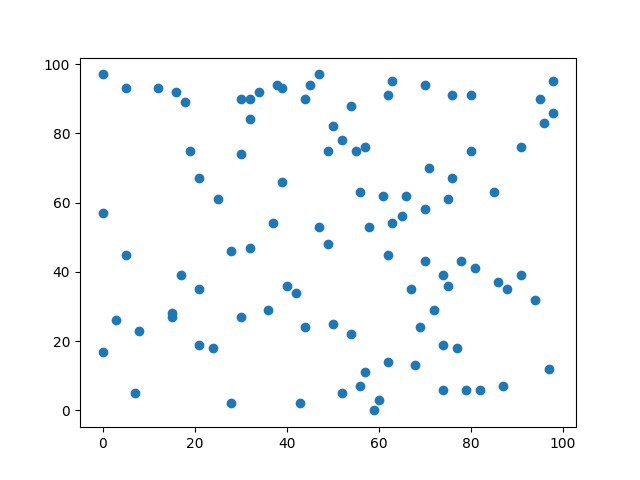

In [39]:
from IPython.display import Image

image_path = os.path.join(folder_path, "scatter_no_print.png")

# 使用 IPython.display.Image 显示图像
Image(image_path)

&emsp;&emsp;接下来的这个示例，我们执行代码来生成散点图并保存图像，同时在控制台打印保存成功的提示内容，代码如下所示：

In [40]:
message_with_code_block_no_print = """This is a message with code block.
The code block is below:
```python
import numpy as np
import matplotlib.pyplot as plt
x = np.random.randint(0, 100, 100)
y = np.random.randint(0, 100, 100)
plt.scatter(x, y)
plt.savefig('scatter_with_print.png')
print('Scatter plot saved to scatter_with_print.png')
```
"""

# 生成给定代码的回复
reply = code_executor_agent.generate_reply(messages=[{"role": "user", "content": message_with_code_block_no_print}])
print(reply)


>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING CODE BLOCK (inferred language is python)...
exitcode: 0 (execution succeeded)
Code output: Scatter plot saved to scatter_with_print.png



&emsp;&emsp;如果代码中有`print`语句，则会放在`Code output`字段后。

In [41]:
# 使用 split 提取 Code output 部分
code_output_start = reply.split('Code output:')[-1].strip()

code_output_start

'Scatter plot saved to scatter_with_print.png'

In [42]:
executor.work_dir

WindowsPath('E:/01_木羽研发/04_Agent正课/15_AutoGen/code_executor_output')

&emsp;&emsp;除此以外，除了加载当前代码环境所使用的`Python`虚拟环境，`LocalCommandLineCodeExecutor` 也可以通过 `virtual_env_context`参数来加载指定的虚拟环境。这是一个非常有用的功能，尤其是在需要确保特定的 `Python` 环境或依赖库时，通过虚拟环境隔离执行环境，可以避免与系统级别的依赖冲突。为了实践这个功能，我们需要先创建一个全新的`Python`虚拟环境。代码如下：

In [43]:
from autogen.code_utils import create_virtual_env

# 创建一个虚拟环境上下文
venv_dir = ".venv"
venv_context = create_virtual_env(venv_dir)

Actual environment location may have moved due to redirects, links or junctions.
  Requested location: ".venv\Scripts\python.exe"
  Actual location:    "E:\01_木羽研发\04_Agent正课\15_AutoGen\.venv\Scripts\python.exe"


In [44]:
import os

# 定义用于存储代码和结果的文件夹名称
folder_name = "code_executor_output_local_venv"

# 获取当前工作目录
current_dir = os.getcwd()

# 将当前工作目录与文件夹名称结合，得到完整的文件夹路径
local_folder_path = os.path.join(current_dir, folder_name)

# 如果文件夹不存在，则创建该文件夹
os.makedirs(local_folder_path, exist_ok=True)

&emsp;&emsp;将新的虚拟环境配置到`LocalCommandLineCodeExecutor`代码解释器中。

In [45]:
from autogen.coding import LocalCommandLineCodeExecutor

# 创建本地命令行代码执行器，使用刚刚创建的文件夹作为工作目录
executor = LocalCommandLineCodeExecutor(
    timeout=10,  # 每次代码执行的超时时间，单位为秒
    work_dir=local_folder_path,  # 使用当前路径下创建的文件夹来存储代码文件
    virtual_env_context=venv_context
)

&emsp;&emsp;运行测试：

In [46]:
from autogen import ConversableAgent

# 创建一个带有代码执行器配置的代理
code_executor_agent = ConversableAgent(
    name="code_executor_agent",  # 代理的名称
    llm_config=False,  # 使用Fasle 说明暂时不需要大模型接入
    code_execution_config={"executor": executor},  # 使用本地命令行代码执行器
)

# 在这个示例中，我们执行代码来生成散点图并保存图像，但不会打印任何内容。

message_with_code_block = """This is a message with code block.
The code block is below:
```python
import numpy as np
x = np.random.randint(0, 100, 100)
y = np.random.randint(0, 100, 100)
print(x)
print(y)
```
"""

# 生成给定代码的回复
reply = code_executor_agent.generate_reply(messages=[{"role": "user", "content": message_with_code_block}])
print(reply)


>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING CODE BLOCK (inferred language is python)...


Exception in thread Thread-10 (_readerthread):
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\envs\autogen\Lib\threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "C:\ProgramData\anaconda3\envs\autogen\Lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\ProgramData\anaconda3\envs\autogen\Lib\threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "C:\ProgramData\anaconda3\envs\autogen\Lib\subprocess.py", line 1599, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "C:\ProgramData\anaconda3\envs\autogen\Lib\codecs.py", line 322, in decode
    (result, consumed) = self._buffer_decode(data, self.errors, final)
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd3 in position 52: invalid continuation byte


TypeError: can only concatenate str (not "NoneType") to str

&emsp;&emsp;当通过 `virtual_env_context` 加载了虚拟环境并执行代码时，如果代码块中使用了虚拟环境中尚未安装的依赖包，执行时就会报错，因为这些包在虚拟环境中并不存在。`TypeError: can only concatenate str (not "NoneType") to str` 这个错误，通常发生在代码执行过程中某些变量是 `None`（例如，`stderr` 或 `stdout` 为空或没有返回值），这很可能是由于执行过程中，系统尝试输出错误日志，但某些输出为空。

&emsp;&emsp;这里用到的依赖包是`numpy`,所以我们先手动安装一下再次进行尝试，代码如下：

In [47]:
import subprocess
import sys

venv_path = r"E:\01_木羽研发\04_Agent正课\15_AutoGen\.venv\Scripts\python.exe"
command = [venv_path, "-m", "pip", "install", "numpy"]

# 执行命令
result = subprocess.run(command, capture_output=True, text=True)

# 打印结果
print(result.stdout)
print(result.stderr)

  Using cached numpy-2.2.1-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.1-cp311-cp311-win_amd64.whl (12.9 MB)


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: E:\01_木羽研发\04_Agent正课\15_AutoGen\.venv\Scripts\python.exe -m pip install --upgrade pip



&emsp;&emsp;安装后再次尝试运行，代码如下：

In [55]:
from autogen import ConversableAgent

# 创建一个带有代码执行器配置的代理
code_executor_agent = ConversableAgent(
    name="code_executor_agent",  # 代理的名称
    llm_config=False,  # 使用Fasle 说明暂时不需要大模型接入
    code_execution_config={"executor": executor},  # 使用本地命令行代码执行器
)

# 在这个示例中，我们执行代码来生成散点图并保存图像，但不会打印任何内容。

message_with_code_block = """This is a message with code block.
The code block is below:
```python
import numpy as np
x = np.random.randint(0, 100, 100)
y = np.random.randint(0, 100, 100)
print(x)
print(y)
```
"""

# 生成给定代码的回复
reply = code_executor_agent.generate_reply(messages=[{"role": "user", "content": message_with_code_block}])
print(reply)


>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING CODE BLOCK (inferred language is python)...
exitcode: 0 (execution succeeded)
Code output: [85 50  1 90 51 27 46 55 90 59 97 13 27 25 21 47 91 96 65 20 51 77 73 29
 47 14 94 69 76 83 47 85 95 57 15 97 88 74 27 56 36 68 71 81  6 33 44 67
 47 89 91  1 24 55 92 34 85 69 74  6 50 34  1 47  0  0 23 16  3 60 63  2
 88 68 55 77 24 27 13  9 10 58 56  9 68 47 62 72 97 29  9 90 53 15 40 63
 18 16  0 56]
[ 7 79 64 12 54 63  3 59 42 80 48 18  0 13 27 46 57  2 97 57 92 54 35 34
  0 51 84 25 65 52 86 69  9 91  8 54 83 95 44 33 72 28 61 57 71  8 83 68
 28 63 27 86 80 51 55  8 97 34 95 56 84 31 66 18 81 27 82 51 12 67 15 95
 80 78 55  7 15 61 18 79 68  8 71 58 28 67  4 46 30 61 89 82 44 62 93 38
 47 35 87 63]



&emsp;&emsp;此时再使用则可以正常运行。

&emsp;&emsp;除了依赖包缺失会出现执行异常情况外，如果输入的是中文字符，在`Windows`开发环境下会报错为`UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 0: invalid start byte`, 那么一种有效的解决办法是修改`AutoGen`的源码，代码如下：

<div align=center><img src="https://muyu20241105.oss-cn-beijing.aliyuncs.com/images/202501031440060.png" width=90%></div>

&emsp;&emsp;因此需要重点说明的是：因为我们采用`AutoGen`依赖包的调用方法，所以编码问题并没有很好的解决办法，因为没有办法去直接更改`AutoGen`项目的源码。同时，如果大家采用`Linux`或者`Mac`系统进行开发，该编码问题是不存在的，所以这也反映了`Windows`开发环境的兼容在很多情况下都存在比较多的问题。

&emsp;&emsp;那么如何解决在`Windows`系统下的字符编码问题的，主要有两种方式：**其一是采用源码安装，修改代码并编译后，通过调用新的代码逻辑处理字符编码问题**。而关于源码使用`AutoGen`的方法，我们在接下来的课程中再给大家展开详细的介绍。 **其二则是使用它的`Docker`容器运行代码执行器。**

## 4.3.2 使用Docker容器运行代码执行器

&emsp;&emsp;`Docker`容器通常是基于 `Linux` 环境 的。虽然 `Docker` 可以在 `Windows` 和 `macOS` 等操作系统上运行，但它的容器本质上是模拟 `Linux` 内核功能的。与`LocalCommandLineCodeExecutor`类似，`AutoGen`也实现在容器内运行代码的执行逻辑，去源码位置定义如下：

<div align=center><img src="https://muyu20241105.oss-cn-beijing.aliyuncs.com/images/202501031536181.png" width=90%></div>

&emsp;&emsp;与本地命令行代码执行器类似，`docker`执行器从输入消息中提取代码块，并将其写入代码文件。对于每个代码文件，它都会启动一个`docker`容器来执行代码文件，并读取代码执行的控制台输出。

<div align=center><img src="https://muyu20241105.oss-cn-beijing.aliyuncs.com/images/202501031534046.png" width=90%></div>

&emsp;&emsp;因此，如果要使用 `DockerCommandLineCodeExecutor`。首先需要确保当前的操作系统上已经安装并配置好 `Docker`。这里可以访问可以访问 `Docker` 官网下载并安装 `Docker`，详细教程如下：

&emsp;&emsp;Windows Desktop桌面版官方下载地址：https://www.docker.com/products/docker-desktop/

- **Step 1. 下载Windwos安装程序**

<div align=center><img src="https://snowball101.oss-cn-beijing.aliyuncs.com/img/202405281549117.png" width=100%></div>

&emsp;&emsp;选择Windows操作系统版本。

<div align=center><img src="https://snowball101.oss-cn-beijing.aliyuncs.com/img/202405281549118.png" width=100%></div>

&emsp;&emsp;选择安装包存放路径，点击等待下载完成即可。

<div align=center><img src="https://snowball101.oss-cn-beijing.aliyuncs.com/img/202405281549119.png" width=100%></div>

- **Step 2. 安装完双击打开Docker**

<div align=center><img src="https://snowball101.oss-cn-beijing.aliyuncs.com/img/202405281549120.png" width=100%></div>

- **Step 3. 执行安装过程**

<div align=center><img src="https://snowball101.oss-cn-beijing.aliyuncs.com/img/202405281549121.png" width=100%></div>

<div align=center><img src="https://snowball101.oss-cn-beijing.aliyuncs.com/img/202405281549122.png" width=100%></div>

- **Step 4. 安装完成后，需要重启电脑才能加载Docker应用**

<div align=center><img src="https://snowball101.oss-cn-beijing.aliyuncs.com/img/202405281549123.png" width=100%></div>

- **Step 5. 重启完电脑后，打开Docker Desktop客户端，首次使用需要接受服务协议**

<div align=center><img src="https://snowball101.oss-cn-beijing.aliyuncs.com/img/202405281549124.png" width=100%></div>

- **Step 6. 这里选择默认配置即可**

<div align=center><img src="https://snowball101.oss-cn-beijing.aliyuncs.com/img/202405281549125.png" width=100%></div>

- **Step 7. 在使用前，需要登陆账户，可以免费注册**

<div align=center><img src="https://snowball101.oss-cn-beijing.aliyuncs.com/img/202405281549126.png" width=100%></div>

&emsp;&emsp;登录后，即可正常使用Docker服务了。

<div align=center><img src="https://muyu001.oss-cn-beijing.aliyuncs.com/img/image-20240528161151941.png" width=100%></div>

&emsp;&emsp;安装并运行 `Docker` 后，则可以按照如下方式设置代码执行器代理：

In [92]:
import os

# 定义用于存储代码和结果的文件夹名称
folder_name = "code_executor_output_docker"

# 获取当前工作目录
current_dir = os.getcwd()

# 将当前工作目录与文件夹名称结合，得到完整的文件夹路径
docker_folder_path = os.path.join(current_dir, folder_name)

# 如果文件夹不存在，则创建该文件夹
os.makedirs(docker_folder_path, exist_ok=True)

&emsp;&emsp;`work_dir`指向本地文件系统目录，就像本地执行情况一样, `docker`容器会挂载这个目录，执行器写入代码文件并输出到其中。

In [99]:
from autogen.coding import DockerCommandLineCodeExecutor


# 创建Docker命令行代码执行器
executor = DockerCommandLineCodeExecutor(
    image="python:3.12-slim",  # 使用给定的docker映像名执行代码。
    timeout=10,
    work_dir=docker_folder_path,  
)


code_executor_agent_using_docker = ConversableAgent(
    "code_executor_agent_docker",
    llm_config=False,  
    code_execution_config={"executor": executor},  
)

&emsp;&emsp;执行代码后，会自动拉取并启动`python:3.12-slim`的镜像。

<div align=center><img src="https://muyu20241105.oss-cn-beijing.aliyuncs.com/images/202501031534045.png" width=100%></div>

In [100]:
message_with_code_block = """This is a message with code block.
The code block is below:
```python
print("你好，测试Docker 环境是否可以运行中文")
```
"""

# Generate a reply for the given code.
reply = code_executor_agent_using_docker.generate_reply(messages=[{"role": "user", "content": message_with_code_block}])
print(reply)


>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING CODE BLOCK (inferred language is python)...
exitcode: 0 (execution succeeded)
Code output: 你好，测试Docker 环境是否可以运行中文



&emsp;&emsp;这里可以看到，当切换成`Docker`运行代码后，则不存在字符编码问题。大家可以根据自己的实际需求来灵活的调整加载代码解释器的方式。

# 5. 案例：AutoGen 构建自动Debug的数据分析器

In [2]:
import os

llm_config = {
    "config_list": [
        {
            "model": "gpt-4o-mini",
            "api_key": os.environ.get("OPENAI_API_KEY"),
            "tags": ["openai"]
        },
        {
            "model": "qwen2.5:32b",
            "base_url": "http://192.168.110.131:11434/v1/",
            "price": [0.00, 0.00],
            "tags": ["ollama"]
        },
        {
            "model": "qwen2.5-coder:32b",
            "base_url": "http://192.168.110.131:11434/v1/",
            "price": [0.00, 0.00],
            "tags": ["ollama-coder"]
        }
    ]
}

In [6]:
code_writer_system_message = """You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. 
If the result indicates there is an error, fix the error and output the code again. Suggest the full code instead of partial code or code changes. If the error can't be fixed or if the task is not solved even after the code is executed successfully, analyze the problem, revisit your assumption, collect additional info you need, and think of a different approach to try.
When you find an answer, verify the answer carefully. Include verifiable evidence in your response if possible.
"""

&emsp;&emsp;对应的中文版本：
```python
code_writer_system_message = """您是一个有帮助的 AI 助手。
使用您的编码和语言技能解决任务。
在以下情况下，建议用户执行 Python 代码（用 Python 编码块表示）或 Shell 脚本（用 sh 编码块表示）。
1. 当您需要收集信息时，使用代码输出您需要的信息，例如浏览或搜索网页，下载/读取文件，打印网页或文件的内容，获取当前日期/时间，检查操作系统等。在输出足够的信息并且任务可以根据您的语言技能解决后，您可以自己解决任务。
2. 当您需要通过代码执行某个任务时，使用代码执行任务并输出结果。一步步地完成任务。如果没有提供计划，首先用语言解释您的计划，明确指出哪些步骤使用代码，哪些步骤使用您的语言技能。
使用代码时，必须在代码块中标明脚本类型。用户无法提供其他反馈或执行任何其他操作，除了执行您建议的代码。
如果您希望用户执行的代码有输出，使用 'print' 函数输出。当代码执行完毕后，检查返回的执行结果。
如果结果表明有错误，请修复错误并再次输出代码。建议完整的代码，而不是部分代码或代码更改。如果错误无法修复，或者即使代码执行成功后任务仍未完成，请分析问题，重新检查假设，收集您需要的额外信息，并思考其他尝试的方法。
当您找到答案后，仔细验证答案。如果可能，包含可验证的证据在您的回应中。
"""
```

In [3]:
import autogen

# 过滤出包含 'ollama' 标签的模型配置
filter_model = {"tags": ["openai"]}

config_model = autogen.filter_config(
    config_list=llm_config["config_list"], 
    filter_dict=filter_model)

In [7]:
from autogen import ConversableAgent

code_writer_agent = ConversableAgent(
    "code_writer_agent",
    system_message=code_writer_system_message,
    llm_config={"config_list": config_model},  # 这里使用 config_model
    code_execution_config=False,  
)

In [11]:
import os
from autogen.coding import DockerCommandLineCodeExecutor

# 定义用于存储代码和结果的文件夹名称
folder_name = "code_executor_output_docker"

# 获取当前工作目录
current_dir = os.getcwd()

# 将当前工作目录与文件夹名称结合，得到完整的文件夹路径
docker_folder_path = os.path.join(current_dir, folder_name)

# 如果文件夹不存在，则创建该文件夹
os.makedirs(docker_folder_path, exist_ok=True)


# 创建Docker命令行代码执行器
executor = DockerCommandLineCodeExecutor(
    image="python:3.12-slim",  # 使用给定的docker映像名执行代码。
    timeout=10,
    work_dir=docker_folder_path,  
)

In [12]:
code_executor_agent = ConversableAgent(
    "code_executor_agent",
    llm_config=False,  
    code_execution_config={"executor": executor},  
)

In [14]:
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message="模拟一个公司的月度销售额，并分析其增长趋势，绘制折现图并保存在本地。",
    max_turns=5,
)

code_executor_agent (to code_writer_agent):

模拟一个公司的月度销售额，并分析其增长趋势，绘制折现图并保存在本地。

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
code_writer_agent (to code_executor_agent):

为了模拟公司的月度销售额并分析其增长趋势，我们需要以下步骤：

1. **模拟数据生成**：生成12个月的销售额数据。我们可以采用一些基础的数学模型，比如设定初始销售额，并加入随机波动以模拟实际情况。
2. **数据分析**：计算每个月的销售增长比率。
3. **绘图**：绘制折线图，并将其保存为图像文件。
4. **输出结果**：输出模拟的销售额数据和增长率。

下面是实施这些步骤的Python代码：

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Simulate monthly sales data for a year
np.random.seed(42)  # For reproducibility
months = np.arange(1, 13)
initial_sales = 10000  # Initial sales figure
growth_rate = 0.1  # Simulated growth rate
sales = []

# Generate sales data
for month in months:
    if month == 1:
        sales.append(initial_sales)
    else:
        # Simulate sales based on previous month and a random fluctuation
        fluctuation = np.random.normal(0, 1500)  # Normal distribution for r

&emsp;&emsp;可视化展示图像：

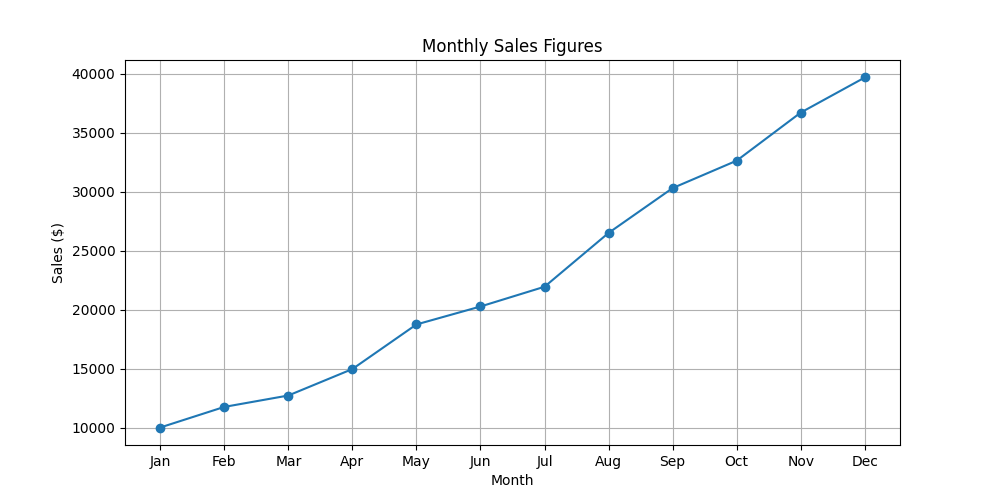

In [17]:
from IPython.display import Image

image_path = os.path.join(docker_folder_path, "monthly_sales_figures.png")

# 使用 IPython.display.Image 显示图像
Image(image_path)